### ebola 예제
- Q. 얼마나 많은 사람들이 에볼라로 인해서 죽었다고 보고됐는가?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt  
import csv

In [15]:
data = pd.read_csv("C:/Users/KMH/Desktop/meyon's/develope/Mastering Python Data Visualization_Code/Mastering Python Data Visualization_Code/Chapter2/ebola.csv")
print(data.columns)
print(data.dtypes)
print(data.head(3))

Index(['Indicator', 'Country', 'Date', 'value'], dtype='object')
Indicator     object
Country       object
Date          object
value        float64
dtype: object
                                    Indicator Country        Date  value
0  Cumulative number of confirmed Ebola cases  Guinea  2014-08-29  482.0
1   Cumulative number of probable Ebola cases  Guinea  2014-08-29  141.0
2  Cumulative number of suspected Ebola cases  Guinea  2014-08-29   25.0


In [16]:
# 시계열 데이터 추이를 보기 위해 object은 date를 datetime으로 변경

data = data.astype({'Date':'datetime64'})
print(data.dtypes)

Indicator            object
Country              object
Date         datetime64[ns]
value               float64
dtype: object


In [17]:
# Indicator중 사망자에 한해 보기위함과 보고된 사례수가 없거나 사망자수가 없는 경우는 필터

filtereddata = pd.merge(data[(data['Indicator'].str.find('deaths') != -1)], data[data['value'] != float(0)])
sorteddata = filtereddata.sort_values([filtereddata.columns[1], filtereddata.columns[2]])
print(sorteddata.head(5))

                                            Indicator Country       Date  \
0         Cumulative number of confirmed Ebola deaths  Guinea 2014-08-29   
1          Cumulative number of probable Ebola deaths  Guinea 2014-08-29   
2         Cumulative number of suspected Ebola deaths  Guinea 2014-08-29   
3   Cumulative number of confirmed, probable and s...  Guinea 2014-08-29   
15  Number of confirmed Ebola deaths in the last 2...  Guinea 2014-08-29   

    value  
0   287.0  
1   141.0  
2     2.0  
3   430.0  
15    8.0  


In [18]:
set(sorteddata['Country'])

# EDA과정을 통해 기니, 라이베리아, 시에라 리온이 다른 국가들보다 확인된 사망자들이 많은 것을 확인
guineadata = sorteddata[(sorteddata['Country'].str.find('Guinea') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)
sierradata = sorteddata[(sorteddata['Country'].str.find('Sierra Leone') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)
liberiadata = sorteddata[(sorteddata['Country'].str.find('Liberia') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)


C:\Users\KMH\AppData\Local\Temp/ipykernel_16612/4064166945.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  guineadata = sorteddata[(sorteddata['Country'].str.find('Guinea') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)
C:\Users\KMH\AppData\Local\Temp/ipykernel_16612/4064166945.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sierradata = sorteddata[(sorteddata['Country'].str.find('Sierra Leone') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)
C:\Users\KMH\AppData\Local\Temp/ipykernel_16612/4064166945.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  liberiadata = sorteddata[(sorteddata['Country'].str.find('Liberia') != -1)][(sorteddata['Indicator'] == 'Cumulative number of confirmed Ebola deaths')].reset_index(drop=True)


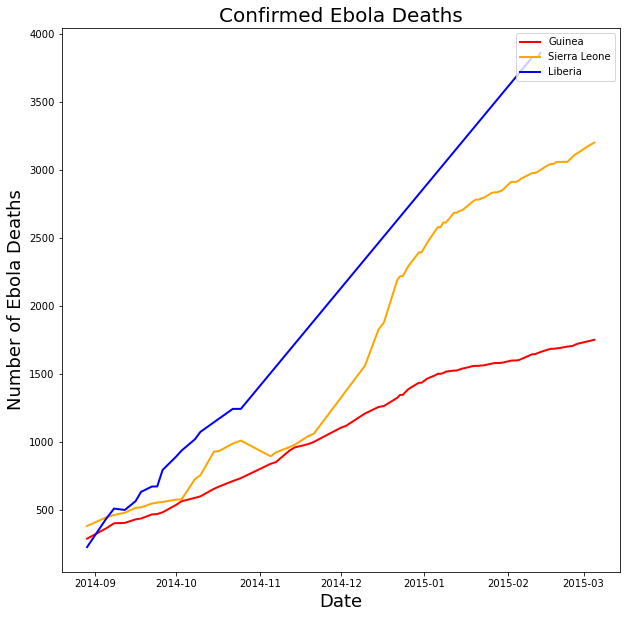

In [20]:
# 기니, 라이베리아, 시에라리온 3개 국가에 대한 시간에 따른 사망자수 추이

plt.figure(figsize=(10,10))
plt.plot(guineadata['Date'], guineadata['value'], color='red', linewidth=2, label = 'Guinea')
plt.plot(sierradata['Date'], sierradata['value'], color='orange', linewidth=2, label = 'Sierra Leone')
plt.plot(liberiadata['Date'], liberiadata['value'], color = 'blue', linewidth=2, label = 'Liberia')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Ebola Deaths', fontsize=18)
plt.title("Confirmed Ebola Deaths", fontsize=20)
plt.legend(loc=1)
plt.show()
